In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv('planes.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


# ustunni datetimega otkazish

In [4]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True, errors='coerce')
df['Date_of_Journey'].isnull().sum()


np.int64(322)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10233 non-null  object        
 1   Date_of_Journey  10338 non-null  datetime64[ns]
 2   Source           10473 non-null  object        
 3   Destination      10313 non-null  object        
 4   Route            10404 non-null  object        
 5   Dep_Time         10400 non-null  object        
 6   Arrival_Time     10466 non-null  object        
 7   Duration         10446 non-null  object        
 8   Total_Stops      10448 non-null  object        
 9   Additional_Info  10071 non-null  object        
 10  Price            10044 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 916.2+ KB


In [6]:
stop_mapping={'non-stop':0,
              '1 stop':1,
              '2 stops':2,
              '3 stops':3,
              '4 stops':4
}
df['Total_Stops_mapped'] = df['Total_Stops'].map(stop_mapping)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Total_Stops_mapped
0,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,2.0
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1.0
2,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1.0
3,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,0.0
4,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,1.0


# air kompaniyalardan qancha odam foydalanganligi 

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Jet Airways'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'SpiceJet'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia')])

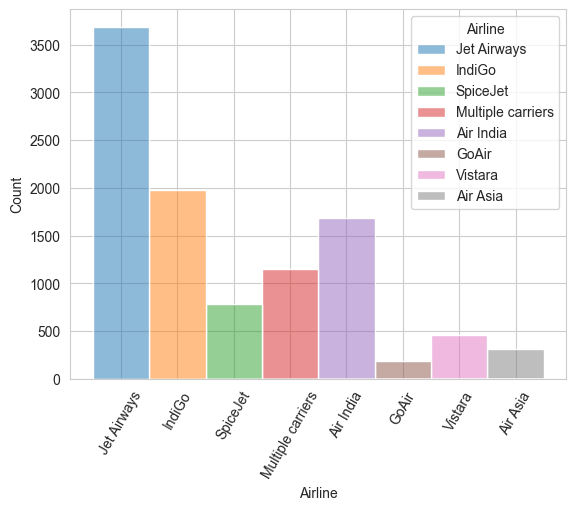

In [7]:
sns.set_style('whitegrid')
sns.histplot(df,
            x='Airline',
            hue='Airline')
plt.xticks(rotation=60)

<Axes: xlabel='Price', ylabel='Airline'>

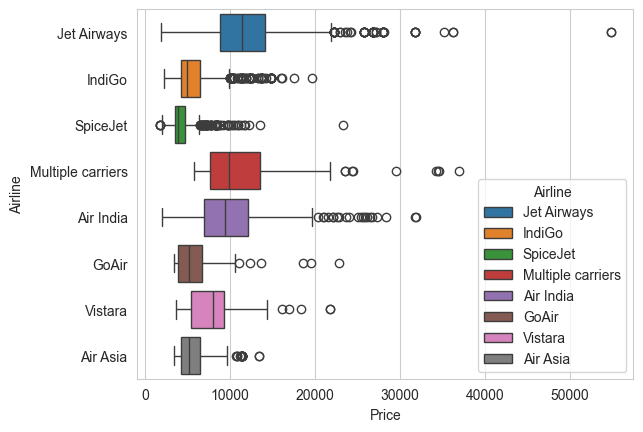

In [8]:
sns.boxplot(data = df, x= "Price", y= "Airline",
            hue= "Airline")

<Axes: xlabel='Source', ylabel='Count'>

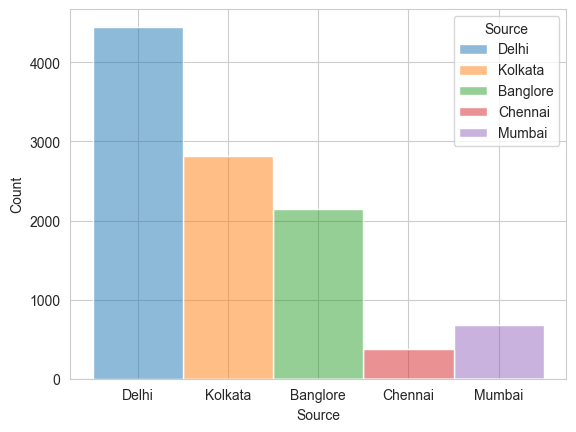

In [9]:
sns.histplot(df,
            x='Source',
            hue='Source')

In [10]:
pd.crosstab(df['Source'], df['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


<Figure size 1200x600 with 0 Axes>

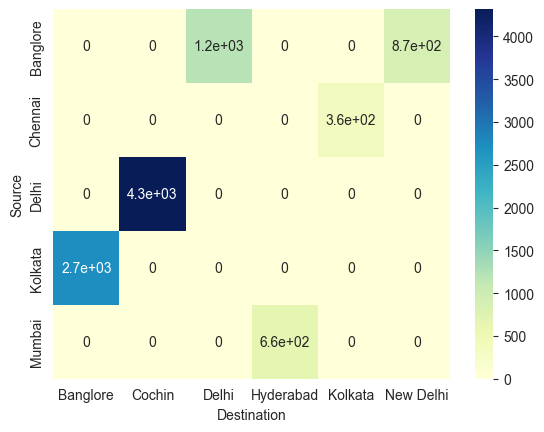

<Figure size 1200x600 with 0 Axes>

In [11]:
sns.heatmap(pd.crosstab(df['Source'], df['Destination']), annot=True, cmap='YlGnBu')
plt.figure(figsize=(12,6))

# toxtashlarni soni narxga nisbati

<Axes: xlabel='Total_Stops_mapped', ylabel='Price'>

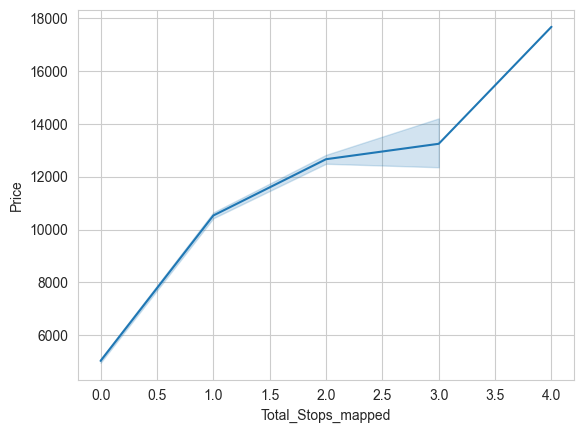

In [12]:
sns.lineplot(df,
            x='Total_Stops_mapped',
            y='Price')

# korib turganimizdek toxtash soni kopaysa bilit narxi ham oshmoqda

In [13]:
df.groupby("Airline").agg(
    mean_price = ("Price", "mean"),
    std_price= ("Price", "std"),
    median_price = ("Price", "median")
)

,mean_price,std_price,median_price
Airline,,,
Air Asia,5629.657627,2016.738954,5192.0
Air India,9593.015605,3865.871975,9443.0
GoAir,5914.477273,2790.815129,5135.0
IndiGo,5684.994638,2266.753552,5013.0
Jet Airways,11605.228850,4230.748840,11467.0
Multiple carriers,10867.189189,3763.674706,9871.0
SpiceJet,4290.035952,1790.851944,3873.0
Vistara,7831.260970,2864.267802,8028.0


# airlinelarni umumiy daromadi va biletlarni ortacha narxi

In [14]:
df_airline = df.groupby('Airline')['Price'].sum().to_dict()
df_airline = pd.DataFrame(df_airline.items(), columns=['Airline', 'Total_Price'])
df_airline.head()

df_airline_median = pd.DataFrame(df.groupby('Airline')['Price'].median().to_dict().items(), columns=['Airline', 'Price'])


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'GoAir'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Multiple carriers'),
  Text(6, 0, 'SpiceJet'),
  Text(7, 0, 'Vistara')])

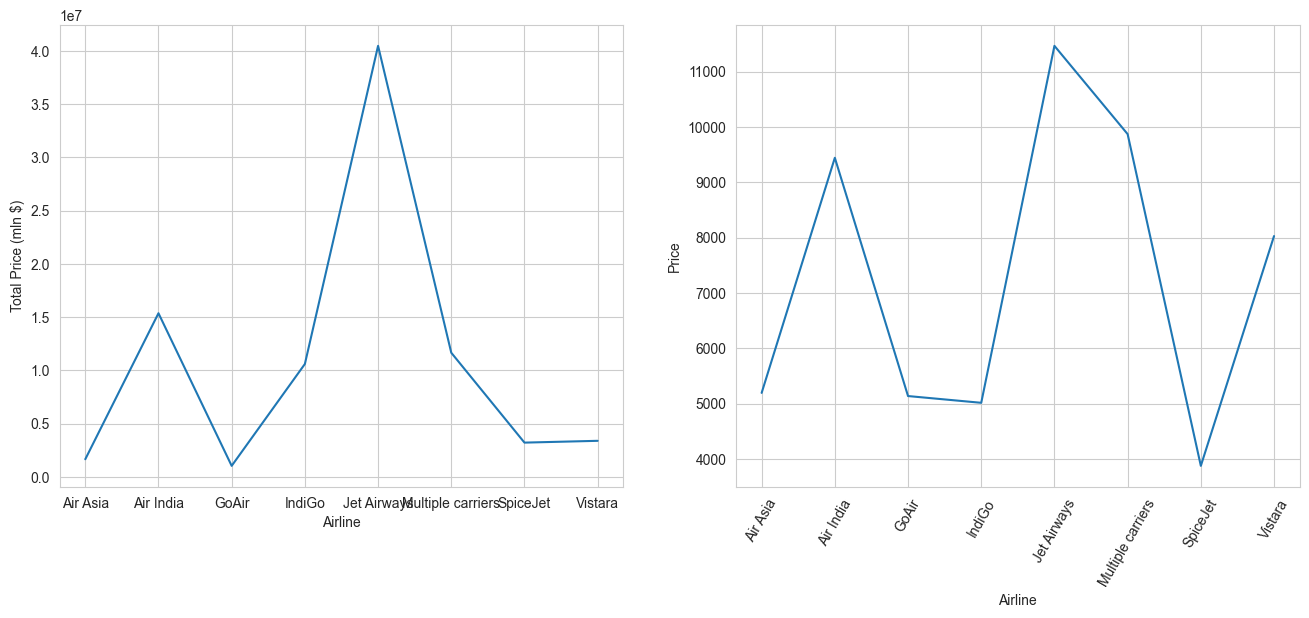

In [15]:
fig, (ax0, ax1) = plt.subplots(1,2)
sns.lineplot(df_airline,
            x='Airline',
            y='Total_Price', ax=ax0)

ax0.set_ylabel('Total Price (mln $)')

sns.lineplot(df_airline_median,
            x='Airline',
            y='Price', ax=ax1)
fig.set_size_inches(16,6)

plt.xticks(rotation=60)

In [16]:
df['Date_of_Journey_month'] = df['Date_of_Journey'].dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Total_Stops_mapped,Date_of_Journey_month
0,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,2.0,6.0
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1.0,5.0
2,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1.0,3.0
3,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,0.0,6.0
4,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,1.0,3.0


# airlainlarni oylarga nisbatan parvozlar soni

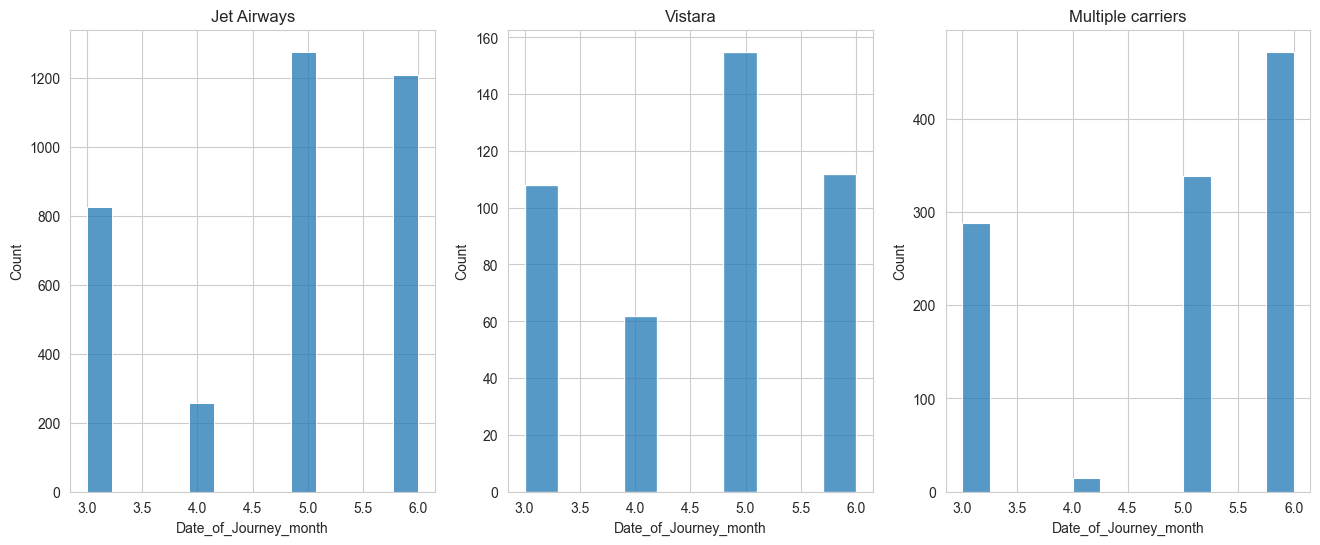

In [17]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3)

sns.histplot(df[df['Airline'] == 'Jet Airways'],
            x='Date_of_Journey_month', ax=ax0)

ax0.set_title('Jet Airways')

sns.histplot(df[df['Airline'] == 'Vistara'],
            x='Date_of_Journey_month', ax=ax1)

ax1.set_title('Vistara')

sns.histplot(df[df['Airline'] == 'Multiple carriers'],
            x='Date_of_Journey_month', ax=ax2)

ax2.set_title('Multiple carriers')

fig.set_size_inches(16,6)

<Axes: >

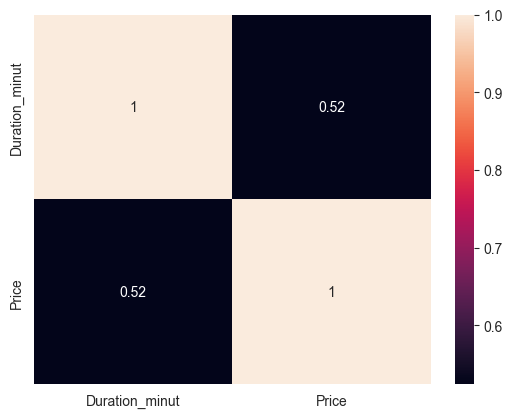

In [18]:
df['Duration_minut'] = pd.to_timedelta(df['Duration']).dt.total_seconds() / 60

sns.heatmap(df[['Duration_minut', 'Price']].corr(), annot=True)